# Titanic Survivors

## Overview

This notebook focuses on predicting whether passenger survived the sinking of the Titanic or not. 

## Data Set

The labeled dataset consists of passenger details with their survive status. A status of 0 means the passenger is dead and the status of 1 means the passenger has survived 

## Data Dictionary

- **PassengerId:** Unique passenger ID
- **Survived:** status of the passenger if survived
- **PClass:** TicketClass
- **Name:** Name of the passenger
- **Sex:** Gender of the passenger
- **Age:** Age of the passenger
- **SibSp:** No of siblings / spouses aboard the Titanic
- **Parch:** No of parents / children aboard the Titanic
- **Ticket:** Ticket number
- **Fare:** Passenger fare
- **Cabin:** Cabin number
- **Embarked:** Port of Embarkation 	

## Importing the data

Lets import the data using pandas dataframe

In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

combining test and train data for analysis

In [2]:
data = [train_data, test_data]

We will use head() to display first 5 rows of the imported dataframe

In [3]:
train_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Lets start analyzing the data by looking at the dataframe info

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some Observations:

- There are a total of 891 passengers in our training set.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
- The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
- The Embarked feature is missing 0.22% of its values, which should be relatively harmless.



In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Some Observations:

- Values for Age, Fare and Cabin are missing

We will fill missing fare from test data with median of the column

## Analyze by visualizing data

In [6]:
#Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


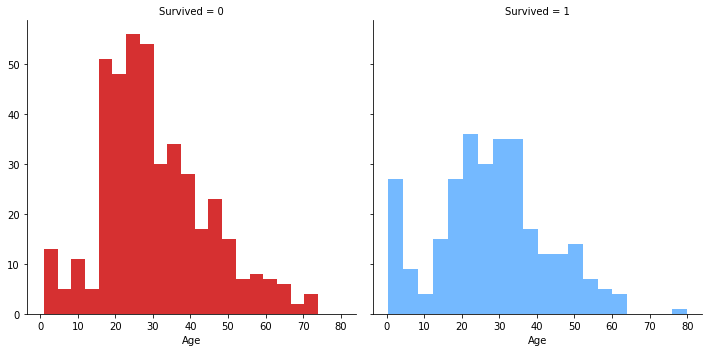

In [7]:
color = {"color": ["#d63031", "#74b9ff"]}
facet_grid = sns.FacetGrid(train_data, col = "Survived", size = 5, hue_kws = color, hue = "Survived")
facet_grid.map(plt.hist, "Age", bins = 20, color = "m")

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

- We should consider Age in our model training.
- Complete the Age feature for null values .
- We should band age groups.

C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


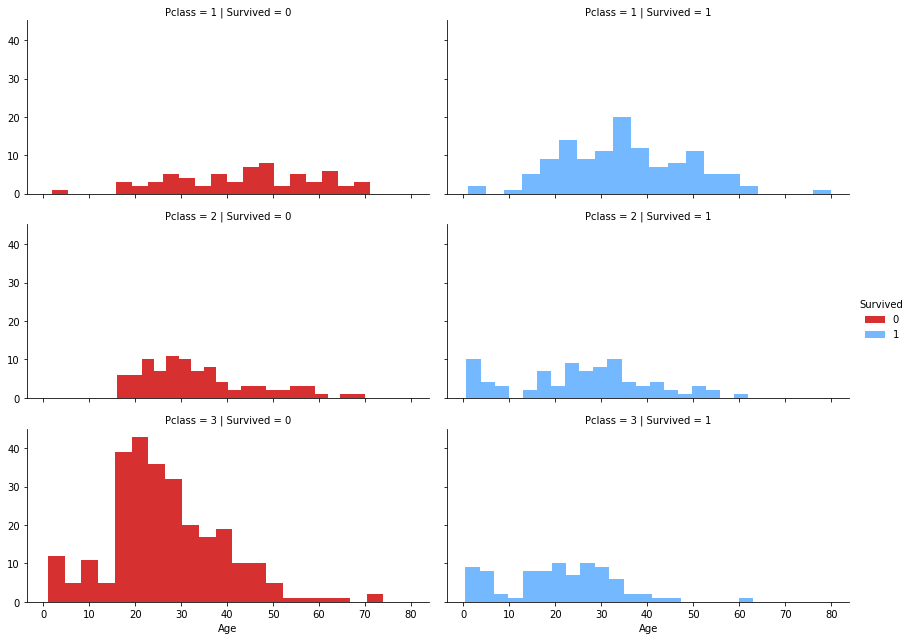

In [8]:
color = {"color": ["#d63031", "#74b9ff"]}
facet_grid = sns.FacetGrid(train_data, col = "Survived", row = "Pclass", size = 3, aspect = 2, hue_kws = color, hue = "Survived")
facet_grid.map(plt.hist, "Age", bins = 20, color = "m")
facet_grid.add_legend();

**Observations.**

- Pclass = 3 had most passengers, however most did not survive
- Infant passengers in Pclass = 2 and Pclass = 3 mostly survived.
- Most passengers in Pclass = 1 survived.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rocks\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

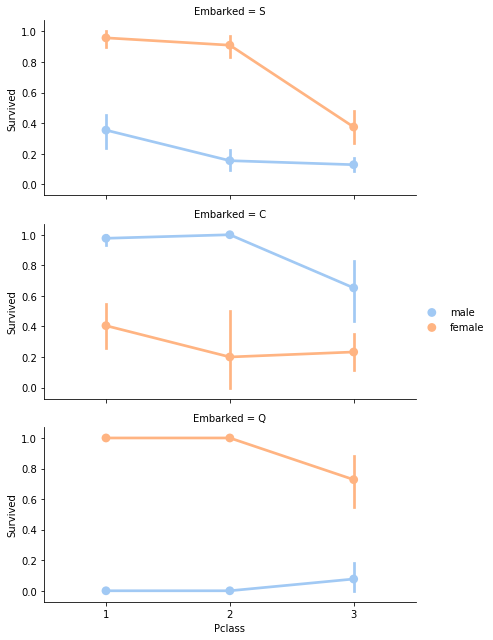

In [9]:
facet_grid = sns.FacetGrid(train_data, row = 'Embarked', size = 3, aspect = 2)
facet_grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = "pastel")
facet_grid.add_legend()

**Observations.**

- Female passengers had much better survival rate than males.
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rocks\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


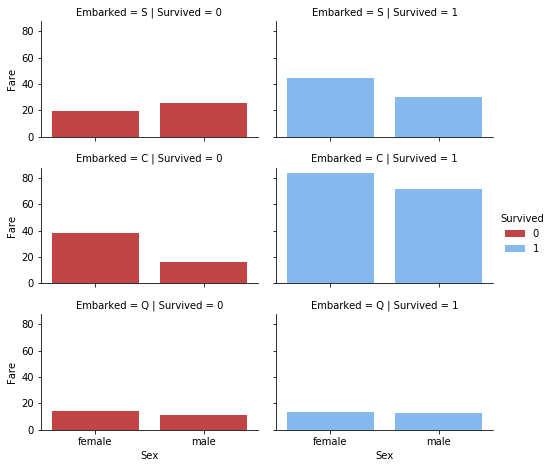

In [10]:
color = {"color": ["#d63031", "#74b9ff"]}
facet_grid = sns.FacetGrid(train_data, row = "Embarked", col = "Survived", size = 2.2, aspect = 1.6, hue_kws = color, hue = "Survived")
facet_grid.map(sns.barplot, "Sex", "Fare", ci = None)
facet_grid.add_legend()

**Observations.**

- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

**Decisions.**

- Consider banding Fare feature.

## Wrangle data

Lets fill the fill the missing values, create new values and correct existing ones based on the decision we made earlier


In [11]:
import numpy as np

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [12]:
for dataset in data:
    dataset["Embarked"].replace(np.nan, dataset["Embarked"].astype(str).value_counts().idxmax(), inplace = True)

Since Fare from test data has only 1 missing values, we will just fill it with the median

In [13]:
test_data["Fare"].fillna(test_data["Fare"].dropna().median(), inplace=True)

### Creating new feature extracting from existing

If we look at the names of the passengers there are quite a few title prefixed to them. Lets extract these titles and separate them from their names

In [14]:
train_data["Title"] = train_data["Name"].map(lambda x: x[x.find(",")+2 : x.find(".")])
test_data["Title"] = test_data["Name"].map(lambda x: x[x.find(",")+2 : x.find(".")])

In [15]:
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [16]:
def replace_title(passenger):
    title = passenger["Title"]
    if title in ["Rev", "Col", "Major", "Jonkheer", "Don", "Capt"]:
        return "Mr"
    elif title == "Sir":
        return "Master"
    elif title in ["the Countess", "Mme", "Lady"]:
        return "Mrs"
    elif title in ["Mlle", "Ms", "Dona"]:
        return "Miss"
    elif title == "Dr":
        if passenger["Sex"] == "Male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return title

In [17]:
for dataset in data:
    dataset["Title"] = dataset.apply(replace_title, axis=1)

In [18]:
test_data["Title"].value_counts()

Mr        244
Miss       80
Mrs        73
Master     21
Name: Title, dtype: int64

Now that we have extracted and replaced titles lets map them to numerical category for easy analysis

In [19]:
for dataset in data:
    dataset["Title"] = dataset["Title"].map({"Mr": 0, "Mrs": 1, "Master": 2, "Miss": 3}).astype(int)

We can look at the survival by the titles using groupby

In [20]:
train_data[["Title", "Survived"]].groupby(["Title"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

Title  Survived
1      1  0.777778
3      3  0.702703
2      2  0.585366
0      0  0.156604

As cabin has many missing values it doesn't make sense to have it around. Therefore, we will drop cabin along with other variables which are not required

In [21]:
train_data = train_data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
test_data = test_data.drop(["Ticket", "Cabin", "Name"], axis=1)
data = [train_data, test_data]

In [22]:
train_data.shape, test_data.shape

((891, 9), (418, 9))

### Converting a categorical feature

Starting by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [23]:
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map( {"female": 1, "male": 0} ).astype(int)

train_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      0
1         1       1    1  38.0      1      0  71.2833        C      1
2         1       3    1  26.0      0      0   7.9250        S      3
3         1       1    1  35.0      1      0  53.1000        S      1
4         0       3    0  35.0      0      0   8.0500        S      0

We have yet to fill the missing values in age column. Lets guess Age values based on Pclass and Gender combinations.

In [24]:
median_age = np.zeros((2,3))
for dataset in data:
    for sex in range(0,2):
        for pclass in range(0,3):
            guess_df = dataset[(dataset["Sex"] == sex) & (dataset["Pclass"] == pclass+1)]["Age"].dropna()
            age_guess = guess_df.median()
            median_age[sex, pclass] = age_guess
median_age

array([[42., 28., 24.],
       [41., 24., 22.]])

In [25]:
for dataset in data:
    for sex in range(0,2):
        for pclass in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == sex) & (dataset.Pclass == pclass+1),'Age'] = median_age[sex,pclass]
    dataset["Age"] = dataset["Age"].astype(int)

In [26]:
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      0
1         1       1    1   38      1      0  71.2833        C      1
2         1       3    1   26      0      0   7.9250        S      3
3         1       1    1   35      1      0  53.1000        S      1
4         0       3    0   35      0      0   8.0500        S      0

Let us create Age bands and determine correlations with Survived.

In [27]:
train_data["AgeBand"] = pd.cut(train_data["Age"], 5)
train_data[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [28]:
for dataset in data:    
    dataset.loc[ dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[ dataset["Age"] > 64, "Age"]
    
train_data = train_data.drop(["AgeBand"], axis=1)
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      0
1         1       1    1    2      1      0  71.2833        C      1
2         1       3    1    1      0      0   7.9250        S      3
3         1       1    1    2      1      0  53.1000        S      1
4         0       3    0    2      0      0   8.0500        S      0

In [29]:
data = [train_data, test_data]

### Create new feature combining existing features

We can actually determine 'FamilySize' of a passenger by combining their 'Parch' and 'SibSp' fields. Once we have the family size we can determine whether the passenger is travelling alone or is travelling with his/her family and drop other fields by keeping this new field

In [30]:
for dataset in data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

train_data[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [31]:
for dataset in data:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1

train_data[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

In [32]:
train_data = train_data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test_data = test_data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
data = [train_data, test_data]
train_data.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      0        0
1         1       1    1    2  71.2833        C      1        0
2         1       3    1    1   7.9250        S      3        1
3         1       1    1    2  53.1000        S      1        0
4         0       3    0    2   8.0500        S      0        1

There are still few columns left with categories. We will now convert them to numeric data

In [33]:
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map( {"S": 0, "C": 1, "Q": 2} ).astype(int)

train_data.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone
0         0       3    0    1   7.2500         0      0        0
1         1       1    1    2  71.2833         1      1        0
2         1       3    1    1   7.9250         0      3        1
3         1       1    1    2  53.1000         0      1        0
4         0       3    0    2   8.0500         0      0        1

We will now create FareBand from Fare

In [34]:
train_data["FareBand"] = pd.qcut(train_data["Fare"], 4)
train_data[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="FareBand", ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [35]:
for dataset in data:
    dataset.loc[ dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"]   = 2
    dataset.loc[ dataset["Fare"] > 31, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

train_data = train_data.drop(["FareBand"], axis=1)
data = [train_data, test_data]

In [36]:
train_data.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    0    1     0         0      0        0
1         1       1    1    2     3         1      1        0
2         1       3    1    1     1         0      3        1
3         1       1    1    2     3         0      1        0
4         0       3    0    2     1         0      0        1
5         0       3    0    1     1         2      0        1
6         0       1    0    3     3         0      0        1
7         0       3    0    0     2         0      2        0
8         1       3    1    1     1         0      1        0
9         1       2    1    0     2         1      1        0

## Model Training and Evaluation

For Supervised Learning we will be using following Models

- Logistic Regression
- KNN or k-Nearest Neighbors
- Decision Tree

In [37]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## Logistic Regression

Let's start with Logistic Regression, fit it with our training variables and label and calculate accuracy

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
log_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\rocks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.12

## k-Nearest Neighbors Algorithm 

We will then use KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85

## Decision Tree

We will now use Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

### Model evaluation

Clearly, Descision Tree has performed better than Logistic Regression and KNN therefore we will predict our test data using Decision Tree

In [44]:
#submission = pd.DataFrame({
#        "PassengerId": test_data["PassengerId"],
#        "Survived": decision_tree_pred
#    })
#submission.to_csv("submission_dec.csv", index=False)